In [6]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [7]:
df = pd.read_csv("D:\datasets\hotels_data (1).csv")
df.head()

,Snapshot ID,Snapshot Date,Checkin Date,Days,Original Price,Discount Price,Discount Code,Available Rooms,Hotel Name,Hotel Stars
0,1,7/17/2015 0:00,8/12/2015 0:00,5,1178,1040,1,6,Best Western Plus Seaport Inn Downtown,3
1,1,7/17/2015 0:00,8/19/2015 0:00,5,1113,982,1,8,Best Western Plus Seaport Inn Downtown,3
2,1,7/17/2015 0:00,8/13/2015 0:00,5,4370,4240,1,3,The Peninsula New York,5
3,1,7/17/2015 0:00,7/26/2015 0:00,5,1739,1667,1,18,Eventi Hotel a Kimpton Hotel,4
4,1,7/17/2015 0:00,8/12/2015 0:00,5,1739,1672,1,3,Eventi Hotel a Kimpton Hotel,4


In [8]:
df.columns
df.dtypes
df.info()
df.shape
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187848 entries, 0 to 187847
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Snapshot ID      187848 non-null  int64 
 1   Snapshot Date    187848 non-null  object
 2   Checkin Date     187848 non-null  object
 3   Days             187848 non-null  int64 
 4   Original Price   187848 non-null  int64 
 5   Discount Price   187848 non-null  int64 
 6   Discount Code    187848 non-null  int64 
 7   Available Rooms  187848 non-null  int64 
 8   Hotel Name       187848 non-null  object
 9   Hotel Stars      187848 non-null  int64 
dtypes: int64(7), object(3)
memory usage: 14.3+ MB


Snapshot ID        0
Snapshot Date      0
Checkin Date       0
Days               0
Original Price     0
Discount Price     0
Discount Code      0
Available Rooms    0
Hotel Name         0
Hotel Stars        0
dtype: int64

In [9]:
df.isnull().sum()
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [10]:
df['Snapshot Date'] = pd.to_datetime(df['Snapshot Date'], errors='coerce')
df['Checkin Date'] = pd.to_datetime(df['Checkin Date'], errors='coerce')
df['Snapshot month']=df['Snapshot Date'].dt.month_name()
df['Snapshot year']=df['Snapshot Date'].dt.year
df['Checkin month']=df['Checkin Date'].dt.month_name()
df['Checkin year']=df['Checkin Date'].dt.year

In [11]:
# Replace any negative values with NaN
df['Available Rooms'] = df['Available Rooms'].apply(lambda x: np.nan if x < 0 else x)

df['Available Rooms'].fillna(df['Available Rooms'].median(), inplace=True)


In [12]:
print(df['Available Rooms'].describe())
print((df['Available Rooms'] < 0).sum())  


count    187829.000000
mean         20.541801
std          39.661491
min           1.000000
25%          10.000000
50%          10.000000
75%          10.000000
max         431.000000
Name: Available Rooms, dtype: float64
0


In [13]:
df['discount %']=(df['Original Price']-df['Discount Price'])/df['Original Price']*100
df['discount %']

0         11.714771
1         11.769991
2          2.974828
3          4.140311
4          3.852789
            ...    
187843     3.007519
187844    11.401425
187845     4.052198
187846     3.343109
187847     8.021108
Name: discount %, Length: 187829, dtype: float64

In [14]:
df['Booked_Rooms'] = df['Original Price'] - df['Discount Price'] 

In [17]:
df['Revenue'] = df['Booked_Rooms'] * df['Discount Price']

In [16]:
df['Available Rooms'].skew()

np.float64(5.229561432011447)

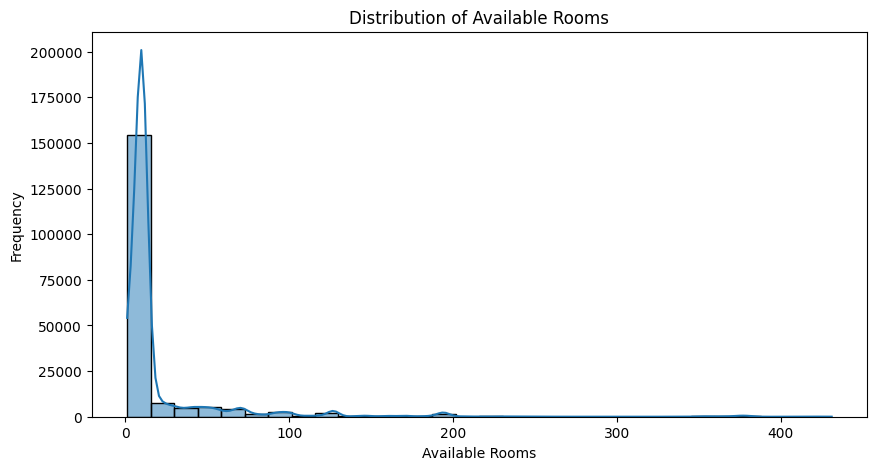

In [207]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.histplot(df['Available Rooms'], kde=True, bins=30)
plt.title("Distribution of Available Rooms")
plt.xlabel("Available Rooms")
plt.ylabel("Frequency")
plt.show()

In [208]:
df['Booking_Pace'] = (df['Checkin Date'] - df['Snapshot Date']).dt.days
df['Month'] = df['Checkin Date'].dt.month
df['Weekend'] = df['Checkin Date'].dt.weekday >= 5


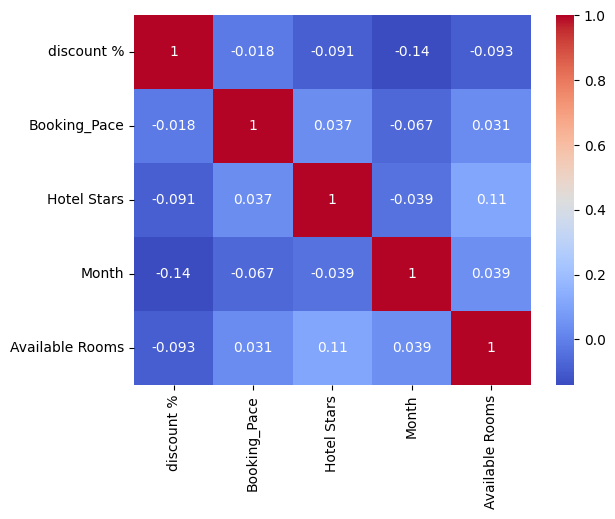

In [209]:
corr_matrix = df[['discount %','Booking_Pace','Hotel Stars','Month','Available Rooms']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

### Discount Effectiveness

In [210]:
booking_potential = (df.groupby('Discount Code')['Available Rooms'].mean().reset_index(name='Avg Booking %').sort_values('Avg Booking %', ascending=False))
booking_potential

,Discount Code,Avg Booking %
2,3,21.954966
1,2,20.853428
0,1,19.414884
3,4,18.905201


#### Price Elasticity Modeling

In [104]:
feature_cols = [
    'discount %', 'Hotel Stars', 'Days', 'Booking_Pace', 
    'Month', 'Weekend'
]\
      + [col for col in df.columns if 'Hotel Name_' in col or 'Discount Code_' in col]


In [105]:
X = df[feature_cols]
y = df['Available Rooms']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,r2_score

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_trainS= scaler.fit_transform(X_train)
X_testS = scaler.transform(X_test)

##### Linear Regression

In [84]:
model_LR=LinearRegression()
model_LR.fit(X_trainS,y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [111]:
y_pred=model_LR.predict(X_testS)

In [113]:
print("The R2 Score is:", r2_score(y_test, y_pred))
print("The RMSE score is :", np.sqrt(mean_squared_error(y_test, y_pred)))


The R2 Score is: 0.8129443237989642
The RMSE score is : 17.227496327142035


#####  Decision Tree

In [ ]:
DT = DecisionTreeRegressor(max_depth=5, random_state=42)   

In [120]:
DT.fit(X_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [122]:
y_pred_DT = DT.predict(X_test)


In [123]:
print("The R2 Score is:", r2_score(y_test, y_pred_DT))
print("The RMSE score is :", np.sqrt(mean_squared_error(y_test, y_pred_DT)))

The R2 Score is: 0.6980881696086672
The RMSE score is : 21.886523653731192


#### sweet spots



In [ ]:
# where discounts maximize bookings without unnecessary revenue loss.
df_sweet = df[['discount %', 'Revenue', 'Available Rooms']].dropna()

sweet_spot_df = df_sweet.groupby('discount %').agg(
    avg_revenue=('Revenue', 'mean'),
    avg_available_rooms=('Available Rooms', 'mean'),
    count=('Revenue', 'size')
).reset_index().sort_values('discount %')

print(sweet_spot_df.head())


   discount %  avg_revenue  avg_available_rooms  count
0    0.581395    1710000.0                  3.0      3
1    0.956522     313225.0                 10.0      1
2    0.977778     306350.0                 10.0     11
3    1.000000     356400.0                 10.0      3
4    1.020408     349200.0                  2.0      5


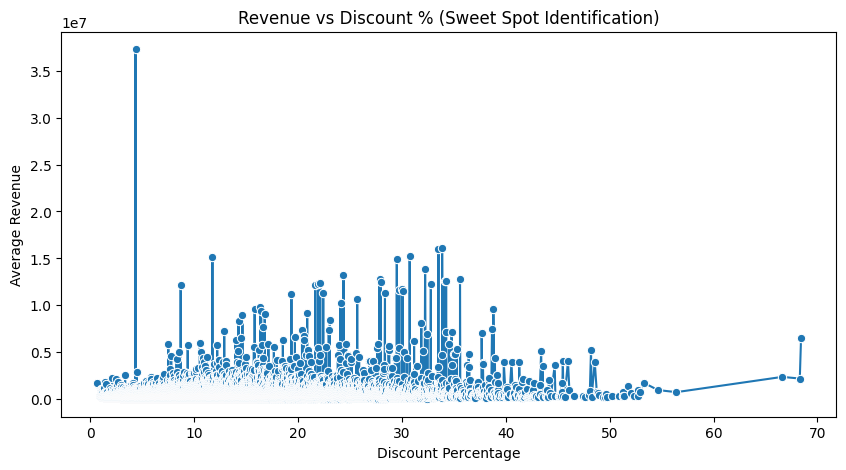

In [19]:
plt.figure(figsize=(10,5))
sns.lineplot(data=sweet_spot_df, x='discount %', y='avg_revenue', marker='o')
plt.title("Revenue vs Discount % (Sweet Spot Identification)")
plt.xlabel("Discount Percentage")
plt.ylabel("Average Revenue")
plt.show()

### Hotel Segmentation


In [214]:
# Group hotel-level summary
hotel_seg = df.groupby('Hotel Name').agg({
    'Original Price': 'mean',
    'discount %': 'mean',
    'Hotel Stars': 'mean',
    'Revenue': 'mean'
}).reset_index()

# Rename columns for clarity
hotel_seg.rename(columns={
    'Original Price': 'Avg_Price',
    'discount %': 'Avg_Discount',
    'Hotel Stars': 'Star_Rating',
    'Revenue': 'Avg_Revenue'
}, inplace=True)

print(hotel_seg.head())


                             Hotel Name    Avg_Price  Avg_Discount  \
0                  1 Hotel Central Park  2201.155738      4.058559   
1                       36 Hudson Hotel   803.500000     12.619667   
2            6 Columbus - a SIXTY Hotel  1518.226277      7.723479   
3  70 Park Avenue Hotel a Kimpton Hotel  1833.279070      9.833477   
4                      AKA Central Park  2277.750000      6.633836   

   Star_Rating    Avg_Revenue  
0          5.0  190121.581967  
1          3.0   69676.000000  
2          5.0  172235.525547  
3          4.0  282495.465116  
4          4.0  334357.500000  


In [215]:
features = ['Avg_Price', 'Avg_Discount', 'Star_Rating', 'Avg_Revenue']
X = hotel_seg[features]


In [221]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [227]:
k2 = KMeans(n_clusters=2, random_state=42)
labels2 = k2.fit_predict(X_scaled)
score2 = silhouette_score(X_scaled, labels2)

k3 = KMeans(n_clusters=3, random_state=42)
labels3 = k3.fit_predict(X_scaled)
score3 = silhouette_score(X_scaled, labels3)

k4 = KMeans(n_clusters=4, random_state=42)
labels4 = k4.fit_predict(X_scaled)
score4 = silhouette_score(X_scaled, labels4)

k5 = KMeans(n_clusters=5, random_state=42)
labels5 = k5.fit_predict(X_scaled)
score5 = silhouette_score(X_scaled, labels5)

print("Silhouette Scores:")
print("K=2:", score2)
print("K=3:", score3)
print("K=4:", score4)
print("K=5:", score5)


Silhouette Scores:
K=2: 0.339560281181213
K=3: 0.3543446947821392
K=4: 0.348115293492647
K=5: 0.3402720344027084


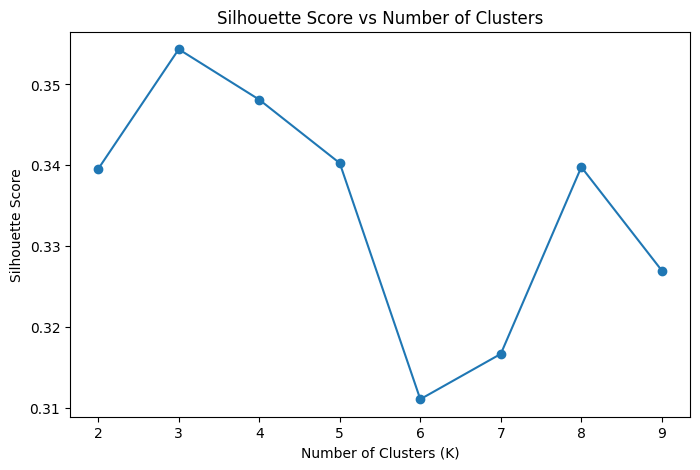

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(range(2, 10), score2, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs Number of Clusters")
plt.show()

In [218]:
cluster_summary = hotel_seg.groupby('Cluster')[features].mean()
print(cluster_summary)


           Avg_Price  Avg_Discount  Star_Rating    Avg_Revenue
Cluster                                                       
0        3801.357219      7.479751     4.777778  960382.886919
1         948.755714      8.737868     2.669643   77108.154594
2        1361.000063     15.359407     3.213115  255399.786877
3        1711.427900      6.715521     4.136364  187918.469239


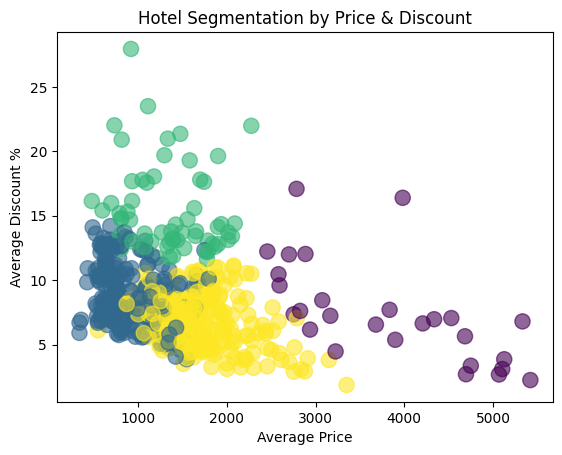

In [219]:
import matplotlib.pyplot as plt

plt.scatter(hotel_seg['Avg_Price'], hotel_seg['Avg_Discount'], 
            c=hotel_seg['Cluster'], s=120, alpha=0.6)
plt.xlabel("Average Price")
plt.ylabel("Average Discount %")
plt.title("Hotel Segmentation by Price & Discount")
plt.show()
